# Projeto 3 de Ciência dos Dados

### Integrantes:


Ana Clara Carneiro

João Pedro Varella

João Guilherme Almeida

## Imports

In [1]:
import pandas as pd
import ast
from pprint import pprint
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
import numpy as np
from sklearn.datasets import load_digits
digits = load_digits()

___

## Contextualização

### Pergunta:


A pergunta principal que será respondida no projeto é como diversos fatores influenciam na bilheteria de um filme. Como forma de estudo, estipularemos uma meta de bilheteria no decorrer das análises.

Sabe-se que anualmente, centenas de filmes entram em cartaz pelos diversos países do mundo. Dentre eles, a grande maioria não atinge altos valores de bilheteria. Por meio desse estudo, será possível compreender o que majoritariamente influencia se um filme será um sucesso ou se será um fracasso de bilheteria com as análises das diversas variáveis do Dataset. Dessa forma, torna-se possível compreender quais as melhores maneiras de se investir numa produção de cinema, a fim de maximizar o ganho em bilheteria. Esse estudo, enfim, possibilita a grandes produtoras compreender a melhor maneira de atingir altos valores de box office. Essas questões serão abordadas no andamento do projeto, para que, no fim, possamos responder à pergunta inicial.

### Sobre o Dataset:

O Dataset utilizado, entitulado "The Movies Dataset", extraído do Kaggle, reúne diversas informações sobre mais de 45 mil filmes. Dentre essas, pode-se citar: atores, diretores, produtores, orçamento, bilheteria, gênero, popularidade, faixa etária, etc. 

No entanto, filtrou-se algumas variáveis julgadas como mais relevantes para o intuito do estudo. Dessa forma, certas categorias foram dispensadas para o andamento das análises.

O Dataset escolhido está disponível no link abaixo:

https://www.kaggle.com/rounakbanik/the-movies-dataset

### Método utilizado:

Para a realização do projeto foram utilizados os seguintes métodos de classificação: Random Forest, Regressão Logística e Máquina de Vetores de Suporte; para que fosse possível, ao final do experimento, comparar os resultados obtidos e identificar qual destes gera uma melhor acurácia.

O primeiro modelo a ser explicado será o de classificação do Random Forest. Este utiliza as variáveis de entrada do nosso Dataset, devolvendo, ao fim, uma variável de saída binária (no caso do nosso projeto, se o filme atinge ou não a meta estipulada). A forma pela qual esse método realiza essa análise é: Inicialmente, recebe um filme qualquer e verifica se este possui uma primeira variável de entrada (Tomemos a presença do ator Tom Hanks como exemplo) e em seguida, checa alguma outra variável de entrada (filme ser ou não de ação) e assim por diante, de forma que cada "árvore" devolverá uma variável binária para se o filme atingiria a meta, baseado nas respostas das variáveis de entrada. Após analisar todas as árvores, o Random Forest devolve uma saída também na forma binária, se o filme conseguiria ou não bater a marca estabelecida, baseado nas respostas finais de cada árvore. Ao final, é gerada a precisão do modelo, o que torna possível definir se ele é realmente eficiente.

O próximo modelo utilizado no estudo foi a Máquina de Vetores de Suporte. Este, assim como o método citado anteriormente, utiliza as variáveis de entrada selecionadas no DataSet para obter uma variável de saída binária no final de sua análise. Entretanto, os artifícos utilizados para realizar a classificação são divergentes. Este possuiu um algoritmo capaz de analisar os dados fornecidos e realizar uma série de suposições, as quais são utilizadas para definir os vetores suportes. Tais vetores são responsáveis por direcionar uma 'linha' extremamente precisa, a qual separa os dados em categorias. Dessa forma, a partir da técnica mencionada anteriormente, é possível classificar com maior exatidão e, com isso, obter uma maior acurácia.


E, por fim, o último modelo utilizado no projeto foi o de Regressão Logística. Esse método usufriu das variáveis de entrada para realizar sua análise e, com isso, estipular uma resposta binária, sendo ela se o filme atingirá ou não a meta estabelecida. Assim, a técnica utilizada para realizar esse estudo é baseada no método da máxima verossimilhança, o qual, por meio dos dados fornecidos, calcula os betas responsáveis por gerar uma combinação maximizada com o menor erro possível. Após isso, esses betas são utilizados para desenhar uma curva em S (característica da regressão logística), a qual é responsável por dividir os dados em diferentes categorias e, por meio disso, realizar uma classificação precisa.

## Lendo arquivos

In [3]:
df = pd.read_csv("movies_metadata.csv")
df2 = pd.read_csv("credits.csv")

C:\Users\anacl\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


## Limpeza do DataFrame "Meta Data"

### Retirada dos JSONs

No dataset utilizado, algumas variáveis estavam codificadas na forma de JSON. Para acessá-las, foi necessário extrair as informações e transformá-las em um dicionário. Nesta etapa da análise, extraímos os nomes dos atores de cada um dos filmes. Dessa forma, foi possível criar um dicionário relacionando duas variáveis, em que a chave corresponde ao nome do ator, e o valor dessa chave é o número de filmes em que cada ator atuou.

In [4]:
from collections import defaultdict
atores = defaultdict(int)
for e in df2.index:
    data_dict = ast.literal_eval(df2["cast"][e])
    for palavras in data_dict:
        nome = palavras['name']
        
        atores[nome] += 1

### Código para limpeza de certas variáveis tais como: revenue, budget, produtora e gênero:

In [5]:
df_0 = df[df['revenue'] > 0]
df_budget = df_0[df_0['budget'] != '0']
df_clean = df_budget[df_budget['production_companies'] != '[]']
df_super_clean = df_clean[df_clean['genres'] != '[]']

In [6]:
df_mega_clean = df_super_clean[["id","genres","budget","revenue","production_companies"]]
df_mega_clean['budget'] = df_mega_clean['budget'].astype(float)
df_mega_clean.head()

C:\Users\anacl\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,id,genres,budget,revenue,production_companies
0,862,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",30000000.0,373554033.0,"[{'name': 'Pixar Animation Studios', 'id': 3}]"
1,8844,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",65000000.0,262797249.0,"[{'name': 'TriStar Pictures', 'id': 559}, {'na..."
3,31357,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",16000000.0,81452156.0,[{'name': 'Twentieth Century Fox Film Corporat...
5,949,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",60000000.0,187436818.0,"[{'name': 'Regency Enterprises', 'id': 508}, {..."
8,9091,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",35000000.0,64350171.0,"[{'name': 'Universal Pictures', 'id': 33}, {'n..."


---

## Análise Exploratória

Primeiramente foram analisadas as variáveis mais simplórias do DataFrame. Dessa forma, foram plotados histogramas que relacionam a frequência absoluta das variáveis Budget e Revenue.

### Histograma da variável budget

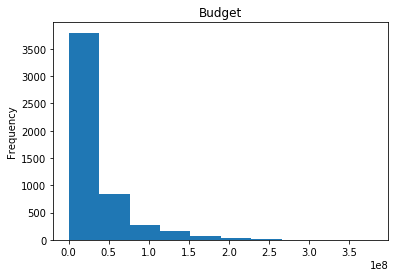

In [7]:
df_mega_clean.budget.plot.hist(density = False)
plt.title('Budget')
plt.show()

##### Pode-se observar pelo histograma acima que dentre os filmes disponibilizados no Dataset, a esmagadora maioria possui um baixo orçamento. Este fato explicita que os grandes filmes orçamentários representam somente uma pequena fatia de todos os filmes produzidos

----

### Histograma da variável revenue

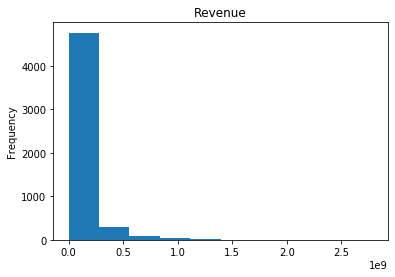

In [8]:
df_mega_clean.revenue.plot.hist(density = False)
plt.title('Revenue')
plt.show()

##### Neste segundo histograma, que relaciona a bilheteria dos filmes, nota-se que, novamente, a esmagadora minoria atingiu altos valores nesse quesito. Isto demonstra que dentre todos os filmes anualmente chegam aos cinemas, poucos deles atingem um grande sucesso

----

### Gráfico de dispersão das variáveis budget e revenue

##### Neste gráfico de dispersão, foram relacionadas as duas variáveis acima, de modo que fosse possível constatar a relação entre filmes com alto orçamento e filmes com alta bilheteria.

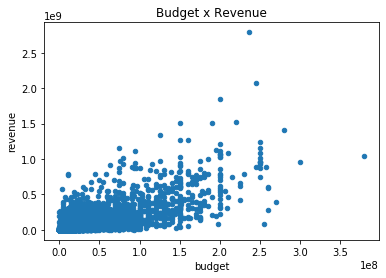

In [9]:
df_mega_clean.plot.scatter(x="budget", y = "revenue")
plt.title('Budget x Revenue')
plt.show()

---

### Gráficos de barras - Gêneros

A fim de disponibilizar os mais diversos filmes do Dataset relacionando-os por seus gêneros, criou-se um gráfico de barras em que cada coluna representa cada gênero presente nos dados. Dessa forma, pode-se concluir que os filmes de drama foram os mais presentes no Dataset escolhido, seguido pelos de comédia e de suspense, como pode ser observado no gráfico abaixo:

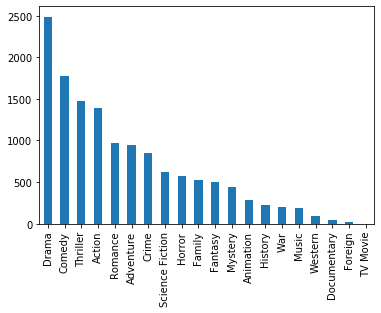

In [10]:
generos = []
for e in df_mega_clean.index:
    data_dict = ast.literal_eval(df_mega_clean["genres"][e])
    for palavras in data_dict:
        generos.append(palavras['name'])

df_generos = pd.DataFrame(generos)
df_generos
geneross = df_generos[0].value_counts()
geneross
geneross.plot(kind='bar')

---

### Box Plot - Gêneros x Revenue

No entanto, para tornar mais visual a análise dos filmes por categoria relacionando com revenue, criou-se um box plot para cada uma delas. Para tal, foi necessário percorrer o dataset original e extrair o valor de bilheteria referente a cada filme; e, por fim, relacionar com cada categoria

In [11]:
revenues_por_categoria = {}
categorias = [
    'Drama', 'Comedy', 'Thriller',
    'Action','Romance','Adventure','Crime','Science Fiction',
    'Horror','Family','Fantasy','Mystery','Animation','History',
    "War",'Music','Western','Documentary','Foreign','TV Movie'
]

for c in categorias:
    revenues_por_categoria[c] = []

for e in df_mega_clean.index:
    data_dict = ast.literal_eval(df_mega_clean["genres"][e])
    for palavras in data_dict:
        cat = palavras["name"]
        if cat in revenues_por_categoria:
            revenues_por_categoria[cat].append(df_mega_clean['revenue'][e])
            
for k in revenues_por_categoria:
    revenues_por_categoria[k] = (np.array(revenues_por_categoria[k]))

Vale ressaltar que para a elaboração dos gráficos abaixo, foi necessário excluir os outliers de cada categoria, pois se estes fossem mantidos, impossibilitariam a visualização dos quartis e da média dos box plots, devido à grande disparidade de valores

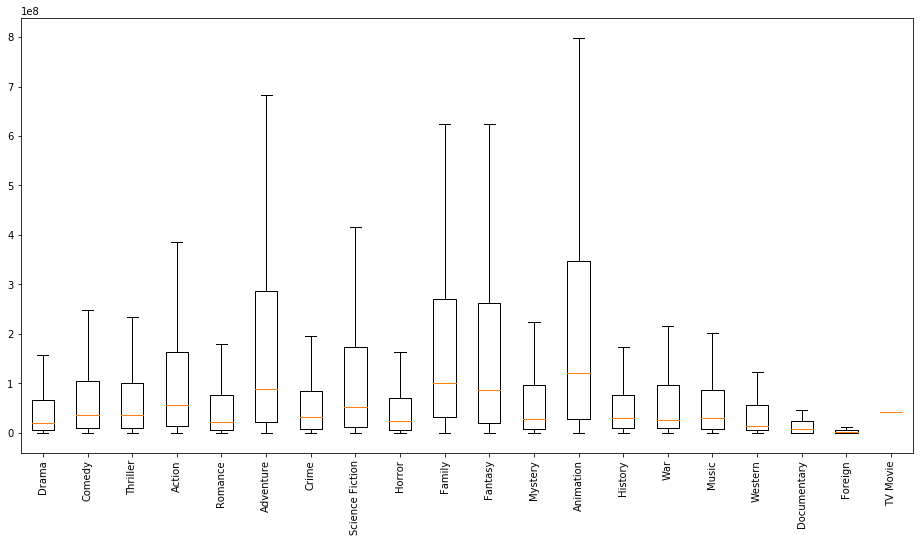

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
ax.boxplot(revenues_por_categoria.values(), showfliers=False)
ax.set_xticklabels(revenues_por_categoria.keys(), rotation='vertical');
plt.show()

##### A partir da análise dos dados, é possível constatar que os filmes do gênero de animação possuem a maior média de arrecadação entre os gêneros do cinema. E, por outro lado, os filmes estrangeiros são os que possuem a menor média de bilheteria

---

### Gráficos de Barras - Produtoras

Analogamente ao que foi feito para os gêneros, montou-se um gráfico de barras para que fosse possível observar quais produtoras mais realizaram filmes dentre as disponiblizadas pelo dataset.

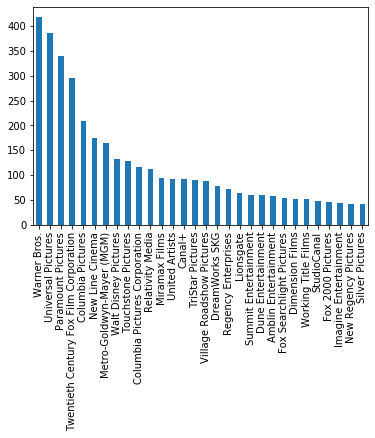

In [13]:
produtoras = []
for e in df_mega_clean.index:
    data_dict = ast.literal_eval(df_mega_clean["production_companies"][e])
    for palavras in data_dict:
        produtoras.append(palavras['name'])

df_produtoras = pd.DataFrame(produtoras)
df_produtoras
produtorass = df_produtoras[0].value_counts().head(30)
produtorass
produtorass.plot(kind='bar')

### Box Plot - Produtoras x Revenue

In [14]:
revenues_por_produtora = {}
produtoras = [
    'Warner Bros.','Universal Pictures','Paramount Pictures','Twentieth Century Fox Film Corporation','Columbia Pictures',
    'New Line Cinema','Metro-Goldwyn-Mayer (MGM)','Touchstone Pictures','Walt Disney Pictures','Columbia Pictures Corporation',
    'Relativity Media','United Artists','Miramax Films','TriStar Pictures','Canal+','Village Roadshow Pictures','DreamWorks SKG',
    'Regency Enterprises','Lionsgate','Amblin Entertainment','Summit Entertainment','Dune Entertainment','Fox Searchlight Pictures',
    'Dimension Films','Working Title Films','Fox 2000 Pictures','StudioCanal','Silver Pictures','Hollywood Pictures',
    'The Weinstein Company'
]

for p in produtoras:
    revenues_por_produtora[p] = []

for f in df_mega_clean.index:
    data_dict = ast.literal_eval(df_mega_clean["production_companies"][f])
    for palavras in data_dict:
        prod = palavras["name"]
        if prod in revenues_por_produtora:
            revenues_por_produtora[prod].append(df_mega_clean['revenue'][f])
        
            
for k in revenues_por_produtora:
    revenues_por_produtora[k] = (np.array(revenues_por_produtora[k]))

Assim como foi feito para a série de box plots anterior, foi necessário retirar os dados dos outliers para que se tornasse possível observar os pontos importantes dos gráficos, tais como quartis e a média dos dados.

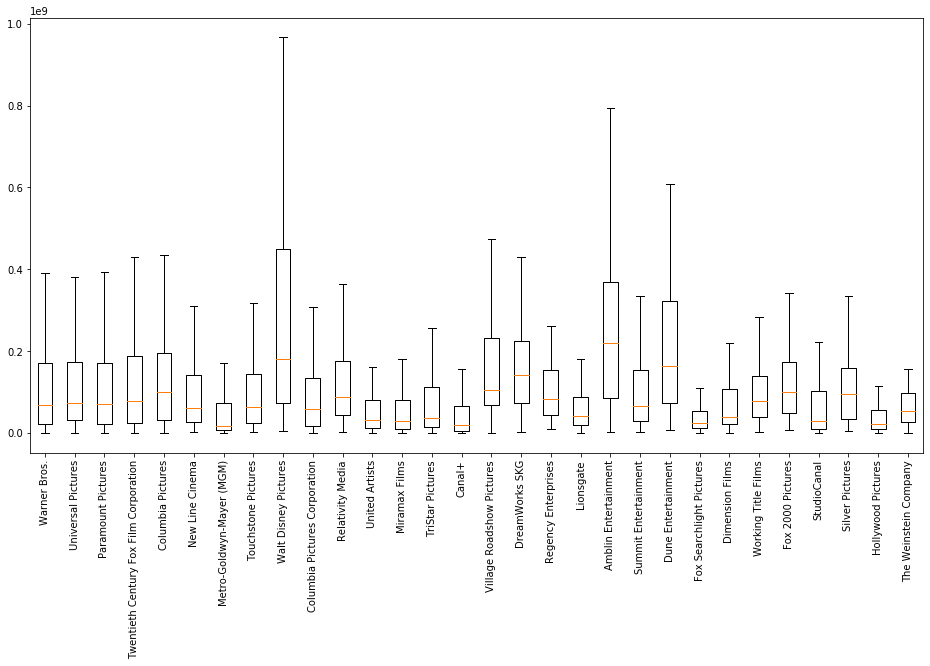

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
ax.boxplot(revenues_por_produtora.values(), showfliers=False)
ax.set_xticklabels(revenues_por_produtora.keys(), rotation='vertical');
plt.show()

##### Dentre as produtoras presentes no Dataset, as duas de maior média de arrecadação são, respectivamente, Amblin Entertainment (responsável pela produção de diversos filmes da Universal Studios) e a Walt Disney Pictures. Por outro lado, a MGM aparentou demonstrar a menor média de bilheteria.

## Limpeza do DataFrame "Credits"

In [16]:
ser_atores = pd.Series(atores)
ser_atores.head()

Tom Hanks        72
Tim Allen        29
Don Rickles      29
Jim Varney       20
Wallace Shawn    75
dtype: int64

Para visualizar de maneira mais ordenada e clara os dados do DataFrame, foi selecionada a parcela de 0.1% de atores com mais produções no cinema. Dessa forma, atingiu-se todos com mais de 28 aparições:

In [17]:
ser_atores = ser_atores[ser_atores > 28].sort_values(ascending=False)

Para utilizar os dados do DataFrame acima no método do Random Forest, foi necessário transformar suas informações em um outro DataFrame com solução binária (0 ou 1).

Neste novo, cada linha representa cada um dos filmes contidos no database inicial e cada coluna representa os atores selecionados previamente:

In [18]:
df_filmes_atores = pd.DataFrame(index=df2.index, columns=ser_atores.index, dtype=np.uint8)
for e in df2.index:
    data_dict = ast.literal_eval(df2["cast"][e])
    for palavras in data_dict:
        nome = palavras['name']
        if nome in df_filmes_atores.columns:
            df_filmes_atores[nome][e] = 1

In [19]:
df_filmes_atores[df_filmes_atores != 1] = 0
df_filmes_atores.head()

,Bess Flowers,Christopher Lee,John Wayne,Samuel L. Jackson,Gérard Depardieu,Michael Caine,John Carradine,Donald Sutherland,Jackie Chan,Frank Welker,...,Syd Saylor,George Raft,Quentin Tarantino,Paul Winfield,Emilio Estevez,Chow Yun-fat,Chazz Palminteri,Carmen Electra,Olaf Hytten,Walter Gotell
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Nota-se que neste DataFrame, a grande maioria dos dígitos é 0, o que representa o óbvio, os atores apareceram em poucos filmes em relação ao total estudado

In [20]:
df.drop_duplicates(subset ="original_title", 
                     keep = 'first', inplace = True) 
df["original_title"].value_counts().value_counts()

1    43373
Name: original_title, dtype: int64

In [21]:
df['bilhao'] = df.revenue > 1e9

## Limpeza das variáveis de entrada tais como: revenue, budget, produtora e gênero:

In [22]:
df_0 = df[df['revenue'] > 0]
df_budget = df_0[df_0['budget'] != '0']
df_clean = df_budget[df_budget['production_companies'] != '[]']
df_super_clean = df_clean[df_clean['genres'] != '[]']

In [23]:
df_mega_clean = df_super_clean[["id","genres","budget","revenue","production_companies"]]
df_mega_clean['budget'] = df_mega_clean['budget'].astype(float)

C:\Users\anacl\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
df_mega_clean.revenue.quantile(0.8)

129924654.00000012

Na célula acima, verificou-se que o valor que corta os 20% das maiores bilheterias é 129 milhões de dólares. Dessa forma, definimos que o valor que seria usado no modelo como meta de bilheteria para os filmes seria 150 milhões de dólares.

In [25]:
milhao = []
for dinheiro in df_mega_clean.revenue:
    if dinheiro > 1.5e8:
        milhao.append(1)
    else:
        milhao.append(0)

Após definir a meta do modelo, percorremos todos os filmes e adicionamos uma nova coluna ao nosso dataframe original, a qual indica se cada filme atingiu a meta estipulada.

In [26]:
df_mega_clean['Fez ou não 150 mi'] = milhao
df_mega_clean.head()

C:\Users\anacl\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,genres,budget,revenue,production_companies,Fez ou não 150 mi
0,862,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",30000000.0,373554033.0,"[{'name': 'Pixar Animation Studios', 'id': 3}]",1
1,8844,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",65000000.0,262797249.0,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...",1
3,31357,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",16000000.0,81452156.0,[{'name': 'Twentieth Century Fox Film Corporat...,0
5,949,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",60000000.0,187436818.0,"[{'name': 'Regency Enterprises', 'id': 508}, {...",1
8,9091,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",35000000.0,64350171.0,"[{'name': 'Universal Pictures', 'id': 33}, {'n...",0


### Filtrando os atores por meio da limpeza estabelecida no DataFrame "MetaData"

In [27]:
lista_teste = []
for numero in df_filmes_atores.index:
    if numero not in df_mega_clean.id:
        lista_teste.append(numero)
        
atores_certos = df_filmes_atores.drop(lista_teste, axis=0)

No dataframe acima, foram selecionados os atores que participam dos filmes filtrados no Dataframe "mega_clean". Portanto, tornou-se possível analisar quais atores participaram dos filmes relevantes. 

In [28]:
atores_certos['Fez ou não 150 mi'] = milhao
atores_certos.head()

,Bess Flowers,Christopher Lee,John Wayne,Samuel L. Jackson,Gérard Depardieu,Michael Caine,John Carradine,Donald Sutherland,Jackie Chan,Frank Welker,...,George Raft,Quentin Tarantino,Paul Winfield,Emilio Estevez,Chow Yun-fat,Chazz Palminteri,Carmen Electra,Olaf Hytten,Walter Gotell,Fez ou não 150 mi
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [29]:
sim_ou_nao = atores_certos['Fez ou não 150 mi']
y = df_mega_clean['Fez ou não 150 mi']

---

# Randon Forest 

Usufruindo-se do modelo Randon Forest com os Dataframes "binários", foi possível analisar de que forma as diversas features do Database impactam na bilheteria dos filmes. E, ao fim, verificar quais são mais impactantes. 

## Influência dos atores na bilheteria

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(atores_certos.drop(['Fez ou não 150 mi'],axis='columns'),sim_ou_nao,test_size = 0.3)

In [31]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 40)
model.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
model.score(X_test,Y_test)

0.7921195652173914

Dado que a acurácia obtida foi de aproximadamente 80%, é plausível afirmar que se utilizando apenas dos atores, o classificador não é confiável o suficiente para determinar se um filme passará ou não a marca estipulada de 150 milhões de doláres. Isso se dá pelo fato de que apenas 20% dos filmes do Dataset sejam capazes de ultrapassar tal meta. Ou seja, um classifcador que julga que nenhum filme atingirá os 150 milhões de dólares é quase tão preciso quanto o que foi obtido acima. Dessa forma, ambos poderiam ser definidos como classificadores ruins.

## Influência das categorias na bilheteria 

In [33]:
categorias2 = defaultdict(int)
for e in df_mega_clean.index:
    data_dict = ast.literal_eval(df_mega_clean["genres"][e])
    for palavras in data_dict:
        tipo = palavras['name']
        categorias2[tipo] += 1

In [34]:
ser_categorias = pd.Series(categorias2)

In [35]:
df_filmes_categorias = pd.DataFrame(index=df_mega_clean.index, columns=ser_categorias.index, dtype=np.uint8)
for e in df_mega_clean.index:
    data_dict = ast.literal_eval(df_mega_clean["genres"][e])
    #print(data_dict)
    for palavras in data_dict:
        tipo = palavras['name']
        #print(tipo)
        if tipo in df_filmes_categorias.columns:
             df_filmes_categorias[tipo][e] = 1


In [36]:
df_filmes_categorias[df_filmes_categorias != 1] = 0
df_filmes_categorias.head()

,Animation,Comedy,Family,Adventure,Fantasy,Drama,Romance,Action,Crime,Thriller,History,Science Fiction,Mystery,Horror,War,Foreign,Documentary,Western,Music,TV Movie
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
X2_train, X2_test, Y2_train, Y2_test = train_test_split(df_filmes_categorias,sim_ou_nao,test_size = 0.3)

model = RandomForestClassifier(n_estimators = 40)
model.fit(X2_train,Y2_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
model.score(X2_test,Y2_test)

0.8335597826086957

Pela mesma justificativa, pode-se concluir que, utilizando-se apenas do gênero dos filmes, o classificador não é capaz de determinar se um filme fará ou não os 150 milhões de dólares na bilheteria. Isso se dá pelo fato de que a acurácia do classificador utilizando somente "gêneros" como variável de entrada resultou, também, em aproximadamente 80%. A diferença do primeiro para o segundo classificador é que a acurácia deste foi levemente maior. Ou seja, indicando que o gênero dos filmes é mais relevante para determinar se um filme atingirá maiores valores de bilheteria em comparação com os atores participantes.

## Influência das produtoras na bilheteria

In [39]:
prod2 = defaultdict(int)
for e in df_mega_clean.index:
    data_dict = ast.literal_eval(df_mega_clean['production_companies'][e])
    for palavras in data_dict:
        produ = palavras['name']
        prod2[produ] += 1

In [40]:
ser_produtora = pd.Series(prod2)

In [41]:
df_filmes_produtoras = pd.DataFrame(index=df_mega_clean.index, columns=ser_produtora.index, dtype=np.uint8)
for e in df_mega_clean.index:
    data_dict = ast.literal_eval(df_mega_clean["production_companies"][e])
    #print(data_dict)
    for palavras in data_dict:
        produ = palavras['name']
        #print(tipo)
        if produ in df_filmes_produtoras.columns:
             df_filmes_produtoras[produ][e] = 1


In [42]:
df_filmes_produtoras[df_filmes_produtoras != 1] = 0
df_filmes_produtoras.head()

,Pixar Animation Studios,TriStar Pictures,Teitler Film,Interscope Communications,Twentieth Century Fox Film Corporation,Regency Enterprises,Forward Pass,Warner Bros.,Universal Pictures,Imperial Entertainment,...,Rumble Entertainment,Hollywood Storm,Czar Pictures,S Pictures,Corner Work,Closed on Mondays Entertainment,Star Thrower Entertainment,Acacia Filmed Entertainment,Кинокомпания «Lunapark»,Инвада фильм
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
X3_train, X3_test, Y3_train, Y3_test = train_test_split(df_filmes_produtoras,sim_ou_nao,test_size = 0.3)

model = RandomForestClassifier(n_estimators = 40)
model.fit(X3_train,Y3_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=40,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [44]:
model.score(X3_test,Y3_test)

0.8505434782608695

Novamente, realizando o Random Forest somente com uma variável de entrada (produtores de filme, desta vez), nota-se que o classificador não obteve uma grande acurácia. Isso pode ser explicado pelos mesmos argumentos expressos anteriormente. Como a precisão resultou em aproxidamente 85%, esse classificador é tão certeiro quanto afirmar que nenhum filme atingirá a meta estipulada (pois somente 20% dos filmes realmente atingiram). De qualquer forma, pode-se concluir que, dentre as estudadas, a questão da produtora é a variável mais impactante na bilheteria do filme, pois esse classificador foi o que apresentou maior acurácia dentre os três.

## Influência do orçamento na bilheteria

In [45]:
df_Bud = pd.DataFrame(df_mega_clean.budget)
df_Bud.head()

,budget
0,30000000.0
1,65000000.0
3,16000000.0
5,60000000.0
8,35000000.0


In [46]:
X5_train, X5_test, Y5_train, Y5_test = train_test_split(df_Bud,sim_ou_nao,test_size = 0.3)

model = RandomForestClassifier(n_estimators = 60)
model.fit(X5_train,Y5_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
model.score(X5_test,Y5_test)

0.8648097826086957

Por fim, o classificador que utiliza como entrada a variável "orçamento" também não pode ser avaliado como um bom classificador, pois este apresenta uma acurácia de aproximadamente 87%, sendo esse valor, novamente próximo à 80%. No entanto, esse classificador indica que a variável "orçamento" é a mais relevante dentre todas as demais, devido ao fato de que este apresentou a maior acurácia dentre todos os anteriores.

# Resultados finais para comparação

## Random Forest

In [48]:
df_forest = pd.concat([
    df_filmes_categorias,
    atores_certos.drop(['Fez ou não 150 mi'],axis='columns'),
    df_filmes_produtoras,
    df_mega_clean.budget,

], axis=1)

In [49]:
X4_train, X4_test, Y4_train, Y4_test = train_test_split(df_forest,sim_ou_nao,test_size = 0.3)

model = RandomForestClassifier(n_estimators = 60)
model.fit(X4_train,Y4_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
model.score(X4_test,Y4_test)

0.8811141304347826

In [51]:
sorted(list(zip(model.feature_importances_, X4_test.columns)), reverse=True)

[(0.15205040643651482, 'budget'),
 (0.014785213131156104, 'Adventure'),
 (0.012488801978401111, 'Drama'),
 (0.008865416893855954, 'Action'),
 (0.007452361073994652, 'Fantasy'),
 (0.00654275869513327, 'Family'),
 (0.006000050055516223, 'Amblin Entertainment'),
 (0.005679157230959931, 'Comedy'),
 (0.005175797197041419, 'Animation'),
 (0.005042507632207272, 'Thriller'),
 (0.004977767375611129, 'Legendary Pictures'),
 (0.004578992923341202, 'DreamWorks Animation'),
 (0.004570692947775364, 'Walt Disney Pictures'),
 (0.00436933756452287, 'Romance'),
 (0.004204436555113889, 'Science Fiction'),
 (0.0038031877550067737, 'Paramount Pictures'),
 (0.003758676391776724, 'Marvel Studios'),
 (0.003691387219389689, 'Warner Bros.'),
 (0.00358770670011199, 'Universal Pictures'),
 (0.0034720807460468114, 'Crime'),
 (0.003362253338605523, 'Sunswept Entertainment'),
 (0.0031448857599358287, 'Tom Hanks'),
 (0.0031343922060904595, 'Horror'),
 (0.0028408103750756706, 'Cameron Diaz'),
 (0.002774593648802593, '

In [52]:
model.feature_importances_

array([0.0051758 , 0.00567916, 0.00654276, ..., 0.        , 0.        ,
       0.15205041])

###### Na célula acima, é possível observar quais variáveis apresentaram uma maior importância para determinar uma alta ou baixa bilheteria de filme.

---

Abaixo, realizou-se a mesma técnica com outros dois métodos. Dessa forma, é possível comparar a acurácia obtida no classificador por 

## Regressão Logística

In [53]:
model = LogisticRegression()
model.fit(X4_train,Y4_train)
Ypred = model.predict(X4_test)
print(accuracy_score(Y4_test,Ypred))

C:\Users\anacl\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8301630434782609


## Máquina de vetores de suporte

In [54]:
model = SVC()
model.fit(X4_train,Y4_train)
Ypred = model.predict(X4_test)
print(accuracy_score(Y4_test,Ypred))

C:\Users\anacl\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.8695652173913043


# Conclusão

A partir de toda a análise, pode-se concluir que durante o projeto, não foi possível criar um classificador capaz de definir com exatidão se um filme atingirá ou não a marca de 150 milhões de dólares. Pode-se afirmar isso pois até mesmo quando o classificador reagrupou todas as variáveis utilizadas (atores, produtoras, orçamento e gêneros de filme), ele não foi capaz de determinar se um filme arrecadaria o valor estipulado, dado que sua acurácia foi inferior a 90% em todos classificadores. O fato da precisão ser inferior a 90% indica que o classificador não é confiável o suficiente devido ao fato de que apenas 20% dos filmes do nosso dataset atingiram os 150 milhões de dólares. Assim, um classificador que julgasse que nenhum filme atingiria esse valor teria uma acurácia de 80%. O classificador desenvolvido no projeto, no entanto, é capaz de prever corretamente 10% a mais em relação ao citado anteriormente.

Não é possível afirmar quais fatores podem aprimorar nosso classificador. No entanto, pode-se deduzir que ao adicionar novas variáveis, o classificador obteria uma maior precisão e confiabilidade, já que este seria capaz de reagrupar mais informações capazes de afirmar se um filme conseguiria ou não ultrapassar a marca dos 150 milhões de dólares. Essas features poderiam ser, por exemplo, "faixa etária", "período no qual o filme foi lançado", entre outras.

Nota-se também que no modelo de Random Forest, a variável mais importante para determinar se um filme conseguiria superar ou não a marca definida é o orçamento. Afinal, ao realizar o feature importance, nota-se que esta possuia a maior relevância mediante as outras analisadas. Além disso, observou-se que dentre os classificadores que relacionaram apenas uma variável de entrada, aquele que relacionou o orçamento apresentou uma maior acurácia.

Por fim, vale ressaltar que a diferença da precisão entre os diferentes métodos de classificação ocorre devido ao fato de que cada um desses métodos considera diferentes estratégias para definir a importância de cada variável. Pode-se estipular, portanto, que o método de Random Forest foi o que teve maior acurácia, pois este foi capaz de definir de melhor forma quais eram as features mais relevantes para julgar se um filme conseguiria atingir a meta. Por outro lado, o método de Regressão Logística obteve uma menor acurácia pois não foi capaz de definir corretamente as melhores e mais importantes features para classificar os filmes.